[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  11 of 11 completed


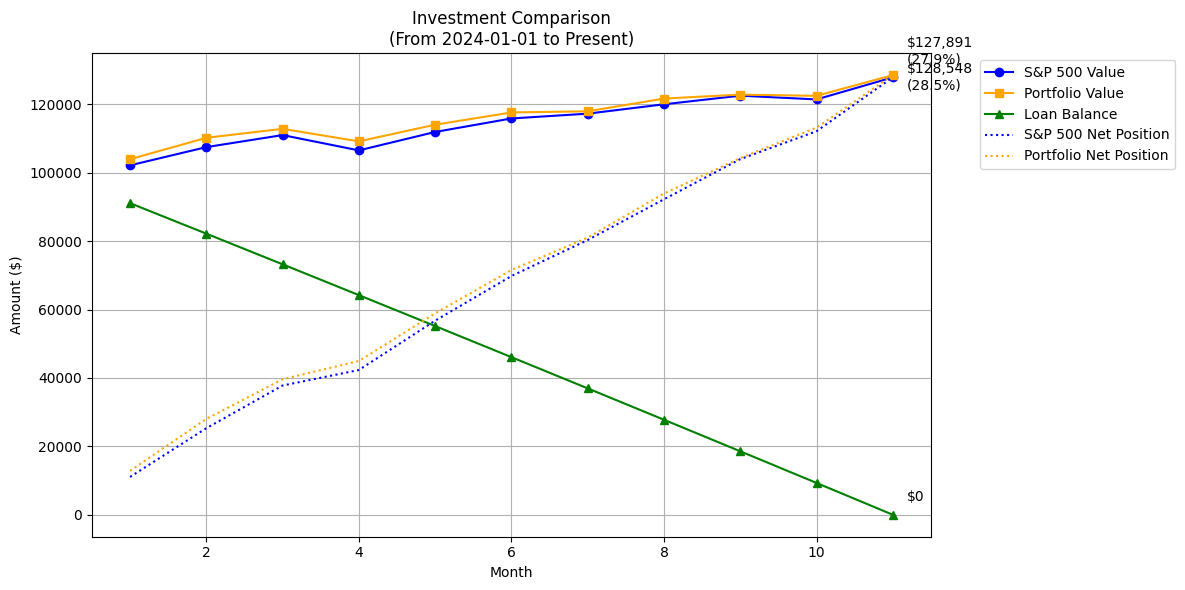


Performance Summary:
Investment Period: 2024-01-01 to 2024-11-27
Initial Investment: $100,000.00

S&P 500 ETF:
Final Value: $127,891.03 (27.89%)
Net Position: $127,891.03 (127.89%)

Portfolio:
Final Value: $128,547.76 (28.55%)
Net Position: $128,547.76 (128.55%)

Loan Balance: $0.00
Loan APR: 5.50%


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from config import STOCKS

# Get data for SPY and stocks
start_date = "2024-01-01"
spy_data = yf.download("SPY", start=start_date)["Adj Close"]
stocks_data = yf.download(STOCKS, start=start_date)["Adj Close"]

# Calculate monthly returns for both portfolios relative to start date
spy_returns = spy_data / spy_data.iloc[0] - 1
stocks_returns = (stocks_data.div(stocks_data.iloc[0]) - 1).mean(axis=1)

# Investment parameters
loan_amount = 100000
annual_interest_rate = 0.055
monthly_interest_rate = annual_interest_rate / 12
resampled_spy_returns = spy_returns.resample("ME").last().dropna()
resampled_stocks_returns = stocks_returns.resample("ME").last().dropna()
investment_months = len(resampled_spy_returns)

# Ensure resampled returns have the same length
resampled_stocks_returns = resampled_stocks_returns[:investment_months]

# Calculate monthly loan payment
monthly_payment = loan_amount * (monthly_interest_rate * (1 + monthly_interest_rate) ** investment_months) / ((1 + monthly_interest_rate) ** investment_months - 1)

# Create DataFrame for analysis
df = pd.DataFrame(
    {
        "Month": list(range(1, investment_months + 1)),
        "Beginning_Balance": [float(loan_amount)] * investment_months,
        "Monthly_Return_SPY": resampled_spy_returns.values.flatten(),
        "Monthly_Return_Stocks": resampled_stocks_returns.values.flatten(),
    }
)

# Calculate monthly values
for i in range(investment_months):
    if i > 0:
        df.loc[i, "Beginning_Balance"] = df.loc[i - 1, "Ending_Balance"]

    df.loc[i, "Interest_Payment"] = df.loc[i, "Beginning_Balance"] * monthly_interest_rate
    df.loc[i, "Principal_Payment"] = monthly_payment - df.loc[i, "Interest_Payment"]
    df.loc[i, "Ending_Balance"] = df.loc[i, "Beginning_Balance"] - df.loc[i, "Principal_Payment"]

    # Calculate investment values relative to start
    df.loc[i, "SPY_Value"] = loan_amount * (1 + df.loc[i, "Monthly_Return_SPY"])
    df.loc[i, "Stocks_Value"] = loan_amount * (1 + df.loc[i, "Monthly_Return_Stocks"])

    df.loc[i, "SPY_Net_Position"] = df.loc[i, "SPY_Value"] - df.loc[i, "Ending_Balance"]
    df.loc[i, "Stocks_Net_Position"] = df.loc[i, "Stocks_Value"] - df.loc[i, "Ending_Balance"]

# Plot results
plt.figure(figsize=(12, 6))

# Plot lines and points
plt.plot(df["Month"], df["SPY_Value"], label="S&P 500 Value", marker="o", color="blue")
plt.plot(df["Month"], df["Stocks_Value"], label="Portfolio Value", marker="s", color="orange")
plt.plot(df["Month"], df["Ending_Balance"], label="Loan Balance", marker="^", color="green")
plt.plot(df["Month"], df["SPY_Net_Position"], label="S&P 500 Net Position", linestyle=":", color="blue")
plt.plot(df["Month"], df["Stocks_Net_Position"], label="Portfolio Net Position", linestyle=":", color="orange")

# Add value annotations to the last points
last_month = df["Month"].iloc[-1]
plt.annotate(
    f'${df["SPY_Value"].iloc[-1]:,.0f}\n({(df["SPY_Value"].iloc[-1]/loan_amount - 1):.1%})',
    (last_month, df["SPY_Value"].iloc[-1]),
    xytext=(10, 10),
    textcoords="offset points",
)

plt.annotate(
    f'${df["Stocks_Value"].iloc[-1]:,.0f}\n({(df["Stocks_Value"].iloc[-1]/loan_amount - 1):.1%})',
    (last_month, df["Stocks_Value"].iloc[-1]),
    xytext=(10, -10),
    textcoords="offset points",
)

plt.annotate(
    f'${df["Ending_Balance"].iloc[-1]:,.0f}',
    (last_month, df["Ending_Balance"].iloc[-1]),
    xytext=(10, 10),
    textcoords="offset points",
)

plt.grid(True)
plt.title(f"Investment Comparison\n(From {start_date} to Present)")
plt.xlabel("Month")
plt.ylabel("Amount ($)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Display results
print("\nPerformance Summary:")
print(f"Investment Period: {start_date} to {spy_data.index[-1].strftime('%Y-%m-%d')}")
print(f"Initial Investment: ${loan_amount:,.2f}")
print("\nS&P 500 ETF:")
print(f"Final Value: ${df['SPY_Value'].iloc[-1]:,.2f} " f"({(df['SPY_Value'].iloc[-1]/loan_amount - 1):.2%})")
print(f"Net Position: ${df['SPY_Net_Position'].iloc[-1]:,.2f} " f"({(df['SPY_Net_Position'].iloc[-1]/loan_amount):.2%})")
print("\nPortfolio:")
print(f"Final Value: ${df['Stocks_Value'].iloc[-1]:,.2f} " f"({(df['Stocks_Value'].iloc[-1]/loan_amount - 1):.2%})")
print(f"Net Position: ${df['Stocks_Net_Position'].iloc[-1]:,.2f} " f"({(df['Stocks_Net_Position'].iloc[-1]/loan_amount):.2%})")
print(f"\nLoan Balance: ${df['Ending_Balance'].iloc[-1]:,.2f}")
print(f"Loan APR: {annual_interest_rate:.2%}")

[*********************100%***********************]  1 of 1 completed


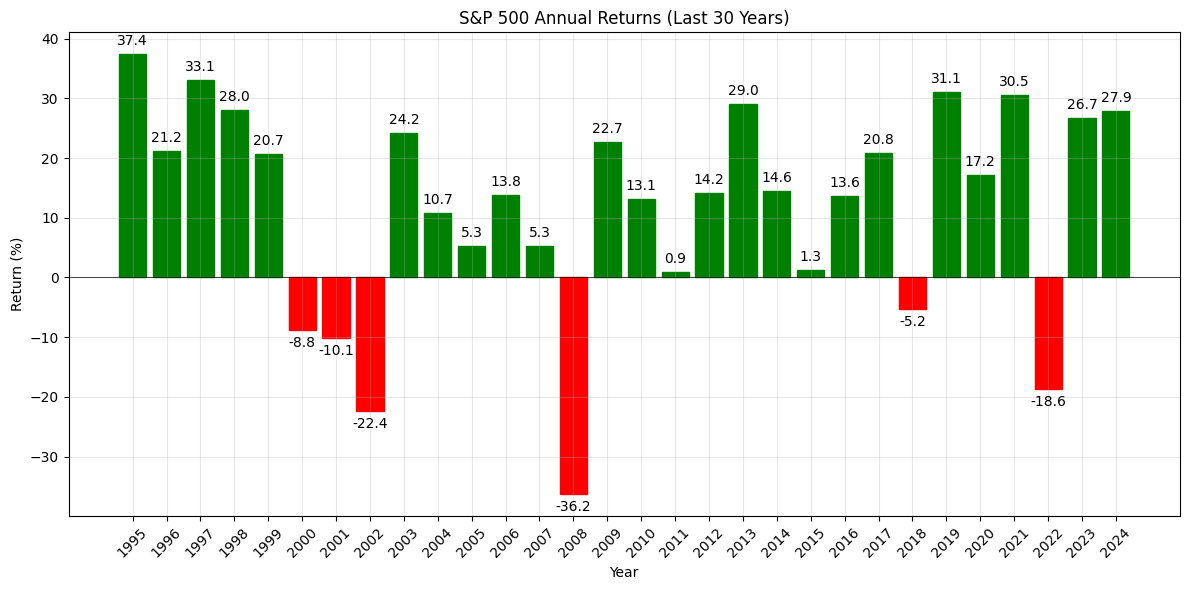


Summary Statistics (Last 30 Years):
Average Annual Return: 12.1%
Median Annual Return: 14.4%
Best Year: 1995 (37.4%)
Worst Year: 2008 (-36.2%)


In [7]:
n = 30
end_date = datetime.now()
start_date = (end_date - timedelta(days=n * 365)).strftime("%Y-01-01")
spy_data = yf.download("SPY", start=start_date)["Adj Close"]

# Calculate annual returns (year-over-year change)
annual_returns = []
years = []

start_year = end_date.year - n
if datetime.now().month < 12:
    start_year += 1

for year in range(start_year, end_date.year + 1):
    try:
        if year == end_date.year:
            # For current year, get from Jan 1st to latest date
            start_price = spy_data[f"{year}-01-01":f"{year}-01-07"].iloc[0].item()
            end_price = spy_data.iloc[-1].item()
        else:
            # For past years, get full year data
            start_price = spy_data[f"{year}-01-01":f"{year}-01-07"].iloc[0].item()
            end_price = spy_data[f"{year}-12-24":f"{year}-12-31"].iloc[-1].item()

        annual_return = (end_price / start_price - 1) * 100
        annual_returns.append(annual_return)
        years.append(year)
    except Exception as e:
        print(f"Error processing year {year}: {str(e)}")
        continue

annual_returns = np.array(annual_returns)
years = np.array(years)

# Plot annual returns
plt.figure(figsize=(12, 6))
bars = plt.bar(years, annual_returns)

# Color bars based on return value
for bar, ret in zip(bars, annual_returns):
    bar.set_color("green" if ret >= 0 else "red")
    plt.text(bar.get_x() + bar.get_width() / 2, ret + (1 if ret >= 0 else -1), f"{ret:.1f}", ha="center", va="bottom" if ret >= 0 else "top")

plt.title(f"S&P 500 Annual Returns (Last {years.size} Years)")
plt.xlabel("Year")
plt.ylabel("Return (%)")
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color="black", linestyle="-", linewidth=0.5)
plt.xticks(years, rotation=45)
plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\nSummary Statistics (Last {n} Years):")
print(f"Average Annual Return: {np.mean(annual_returns):.1f}%")
print(f"Median Annual Return: {np.median(annual_returns):.1f}%")
print(f"Best Year: {years[np.argmax(annual_returns)]} ({max(annual_returns):.1f}%)")
print(f"Worst Year: {years[np.argmin(annual_returns)]} ({min(annual_returns):.1f}%)")

In [1]:
from data import log_return, winsor_mean_cov
from portfolios import EWP, RPP, CVaR
from config import START_YEAR, ROLLING_WINDOW, ADJUST_PERIOD, STOCKS
import yfinance as yf
from datetime import datetime, timedelta


start_date = f"{START_YEAR}-01-01"
end_date = datetime.now().strftime("%Y-%m-%d")

data = yf.download(STOCKS, start=start_date, end=end_date)["Adj Close"]
returns = log_return(data)

portfolio_data = []

# Split returns into periods of ADJUST_PERIOD length
data_list = []
for i in range(0, len(returns), ADJUST_PERIOD):
    returns_by_period = returns.iloc[i : i + ADJUST_PERIOD]
    data_list.append(returns_by_period)
    mu, sigma = winsor_mean_cov(returns_by_period)
    portfolio_data.append(
        {
            "date": returns_by_period.index[0].date(),
            "returns": returns_by_period,
            "mu": mu,
            "sigma": sigma,
            "portfolios": {
                "EWP": EWP(mu, sigma),
                "RPP": RPP(mu, sigma),
                "CVaRP": CVaR(returns_by_period),
            },
        }
    )

[*********************100%***********************]  11 of 11 completed


In [2]:
for i in range(len(portfolio_data)):
    print(portfolio_data[i]["date"])
    print(portfolio_data[i]["portfolios"])

2023-01-04
{'EWP': array([0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909]), 'RPP': array([0.07299433, 0.05384325, 0.09631278, 0.05620135, 0.14341764,
       0.07916508, 0.0472525 , 0.0675105 , 0.17344258, 0.10812858,
       0.10173141]), 'CVaRP': array([2.80451120e-01, 4.68480570e-09, 5.06301289e-09, 1.40777584e-09,
       2.25496380e-09, 2.94445611e-09, 1.38042076e-01, 1.25762223e-08,
       1.10983790e-01, 4.66268978e-01, 4.25400633e-03])}
2023-03-31
{'EWP': array([0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909]), 'RPP': array([0.06739485, 0.05514583, 0.10946709, 0.05770278, 0.18242687,
       0.08718252, 0.06000029, 0.06530876, 0.13961689, 0.08197535,
       0.09377877]), 'CVaRP': array([3.63153019e-01, 1.57545814e-01, 1.06597083e-01, 7.28407089e-08,
       2.67289312e-01, 9.50696967e-08, 3

In [13]:
start_date = portfolio_data[2]["date"]
end_date = start_date + timedelta(days=ADJUST_PERIOD)
test_data = returns.loc[start_date:end_date]  # Remove to_numpy() since backtest expects pandas DataFrame
# from metrics import backtest, drawdown_time

# portfolios = [(name, portfolio) for name, portfolio in portfolio_data[2]["portfolios"].items()]
# backtest(test_data, portfolios[0][1])  # Need to extract just the portfolio weights from the tuple
test_data
because already pctchange change later

Ticker,AAPL,AMZN,BRK-B,GOOGL,JNJ,JPM,META,MSFT,PG,V,XOM
Date,,,,,,,,,,,
2023-06-28,0.006308,-0.001084,-0.003555,0.015513,-0.002023,-0.004392,-0.006150,0.003819,-0.000200,0.002723,0.008097
2023-06-29,0.001795,-0.008874,0.008226,-0.009027,0.006971,0.034327,-0.013267,-0.002385,-0.004075,0.027518,0.012259
2023-06-30,0.022840,0.019051,0.012067,0.005025,0.008616,0.013917,0.019173,0.016253,0.015675,0.013396,0.005141
2023-07-03,-0.007815,-0.001075,0.002928,0.001669,-0.013197,0.008012,-0.003351,-0.007516,0.004996,0.002061,0.001956
2023-07-05,-0.005889,0.001228,-0.001287,0.015312,-0.003311,-0.006684,0.028776,0.000473,-0.001706,0.006200,-0.005131
2023-07-06,0.002506,-0.015614,-0.000293,-0.013562,-0.007460,-0.009936,-0.008118,0.009184,-0.001643,-0.002383,-0.038036
2023-07-07,-0.005909,0.011002,-0.001641,-0.005259,-0.014649,0.007859,-0.005013,-0.011938,-0.021212,-0.010225,0.002329
2023-07-10,-0.010915,-0.020631,0.000674,-0.025687,0.001631,0.005596,0.012213,-0.016113,0.000403,0.007206,0.014722
2023-07-11,-0.002814,0.012895,0.006545,0.005908,-0.005532,0.015518,0.014146,0.001927,-0.005254,0.009985,0.012153


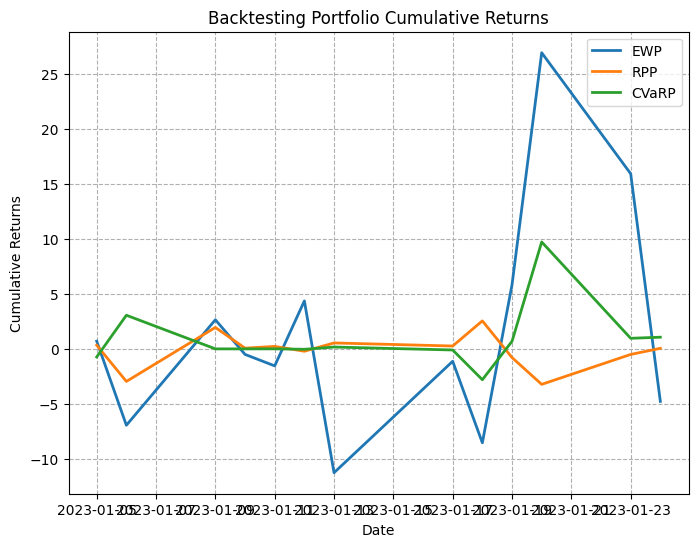

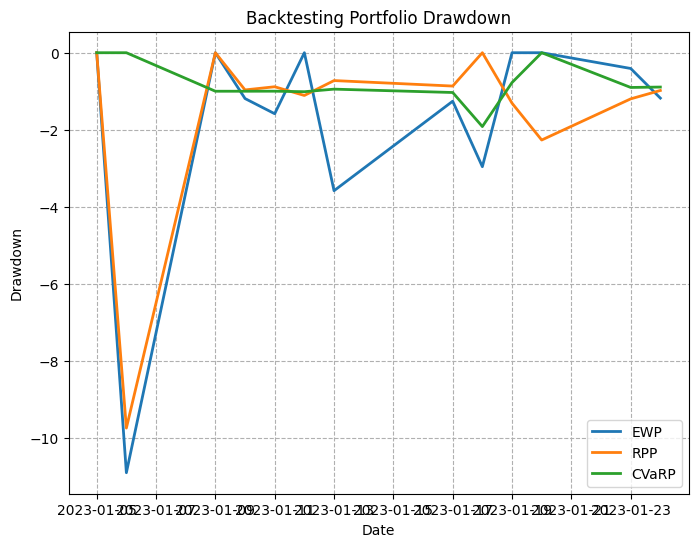

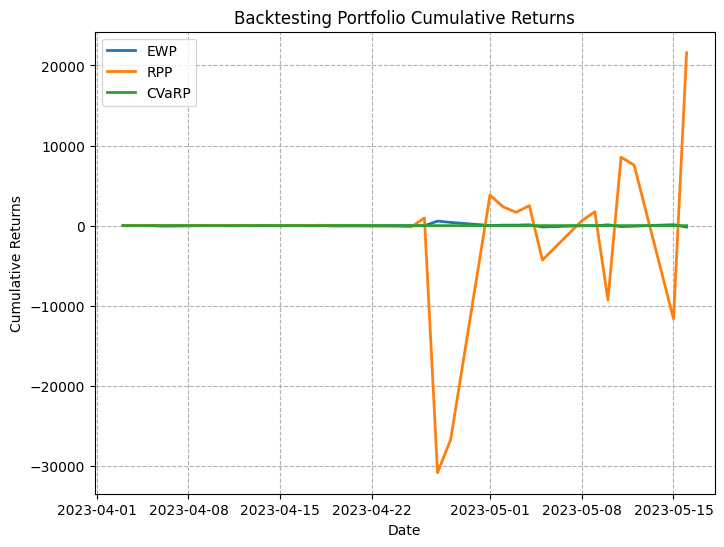

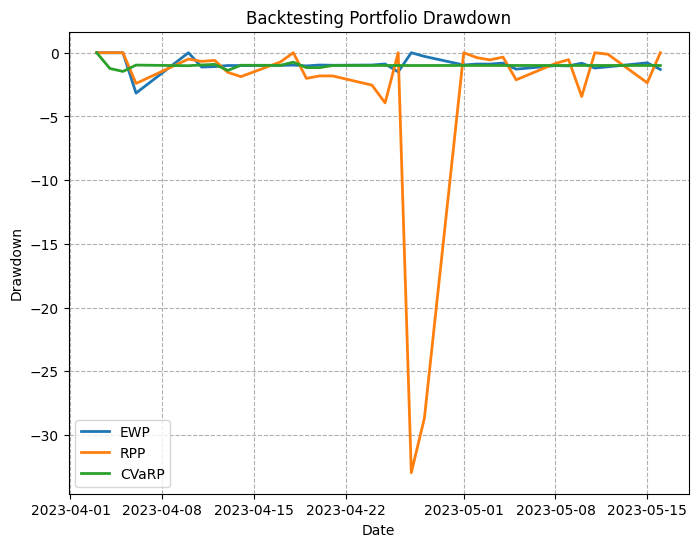

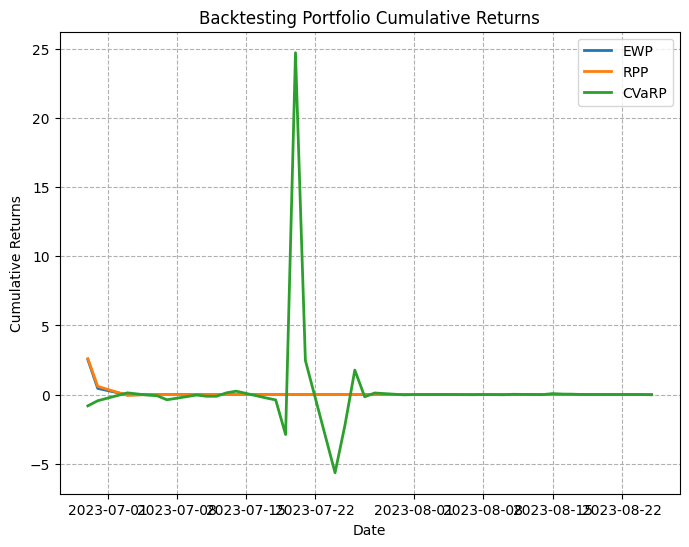

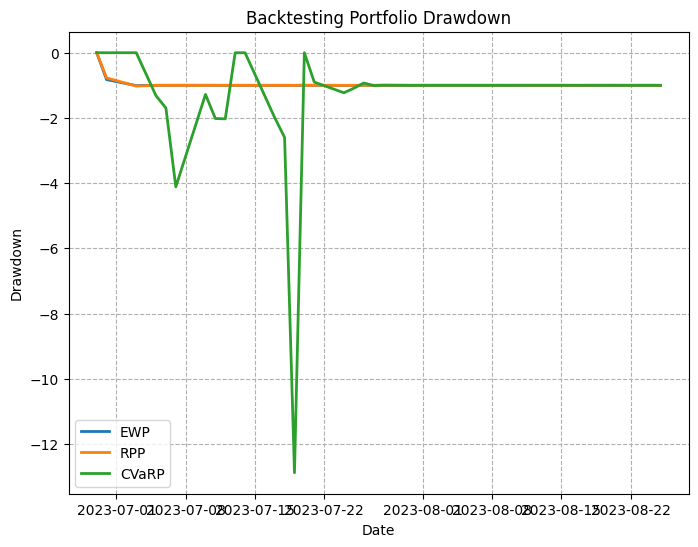

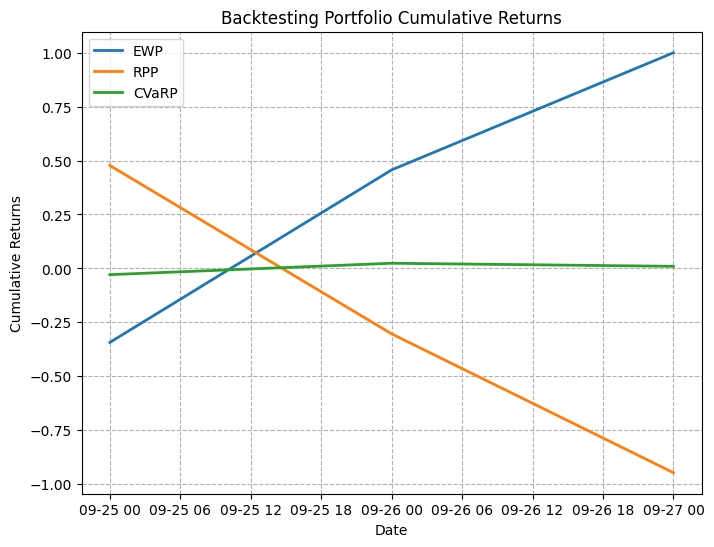

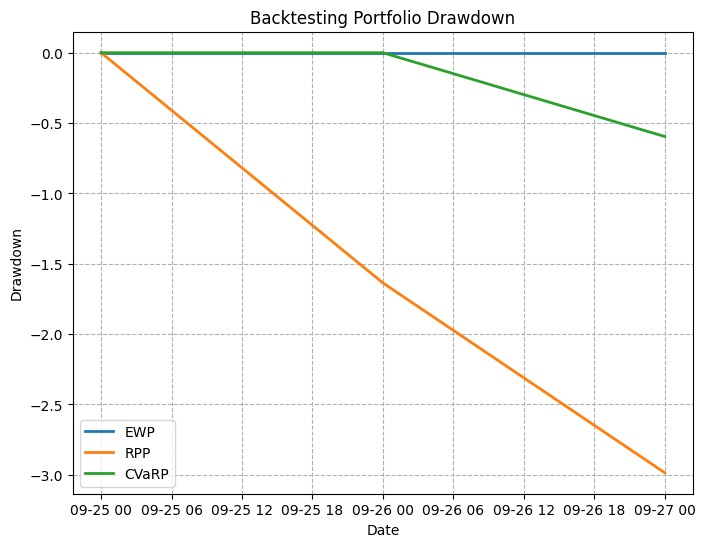

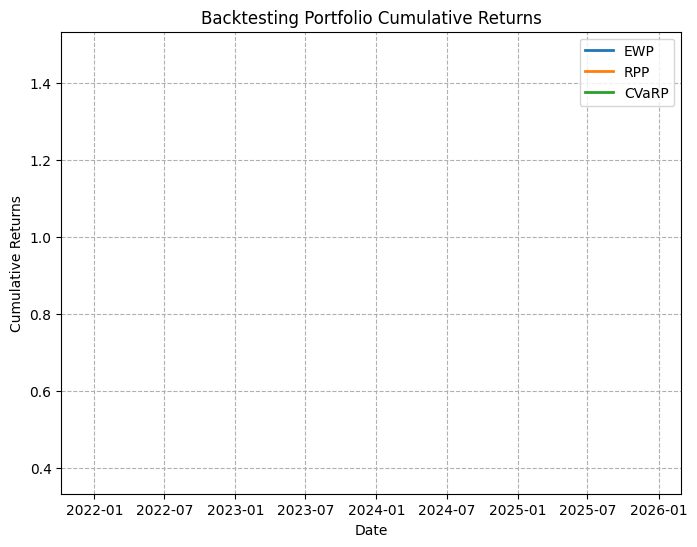

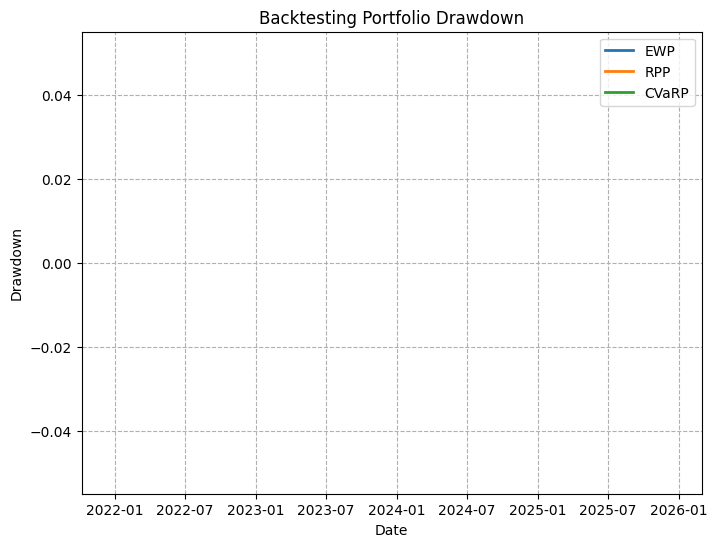

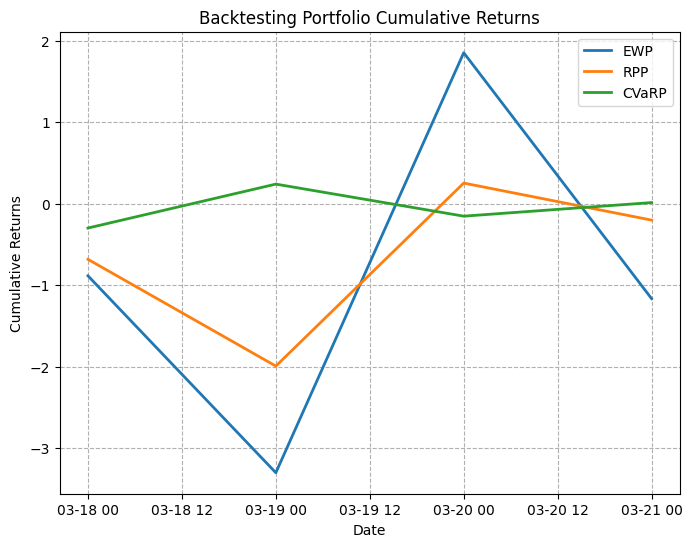

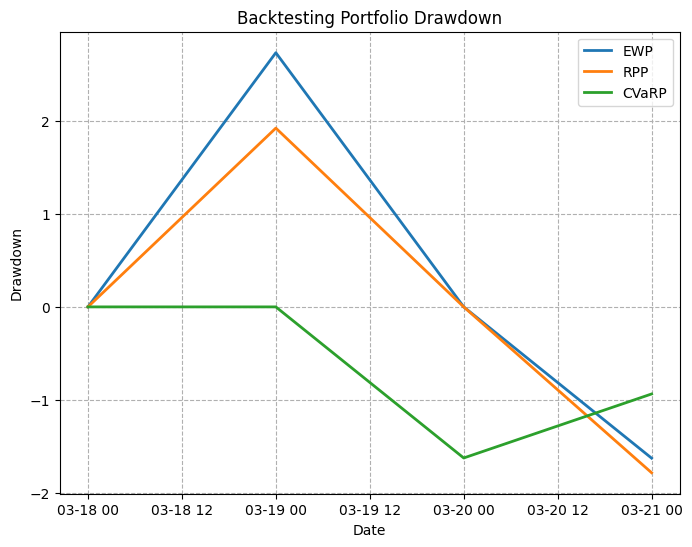

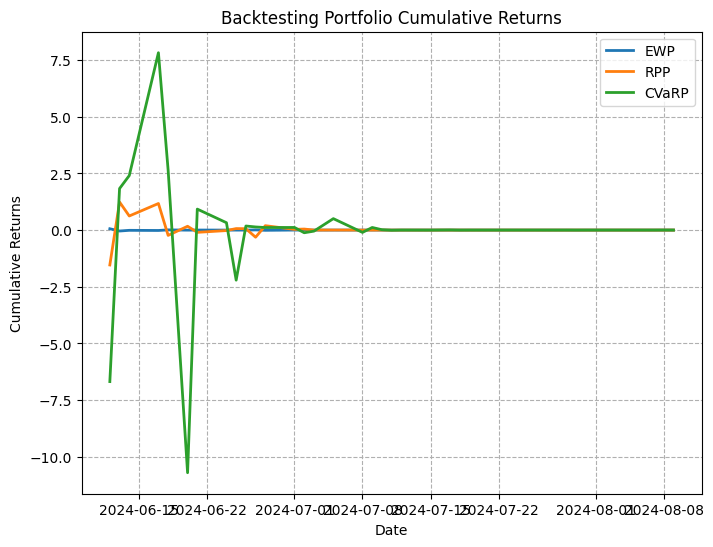

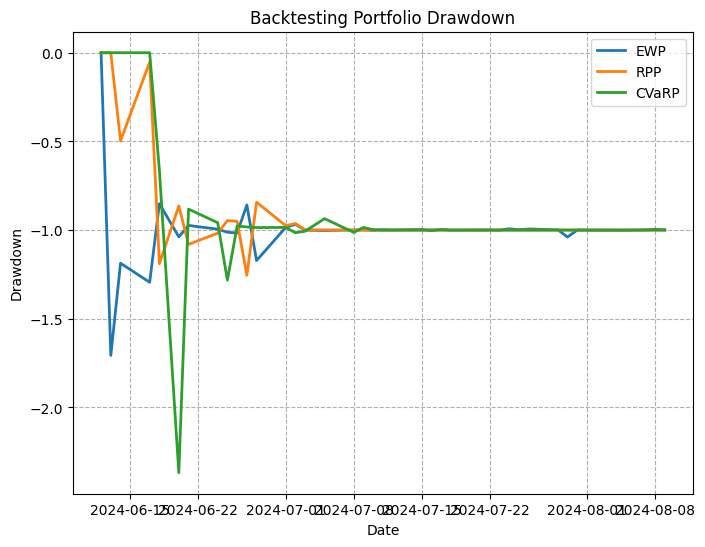

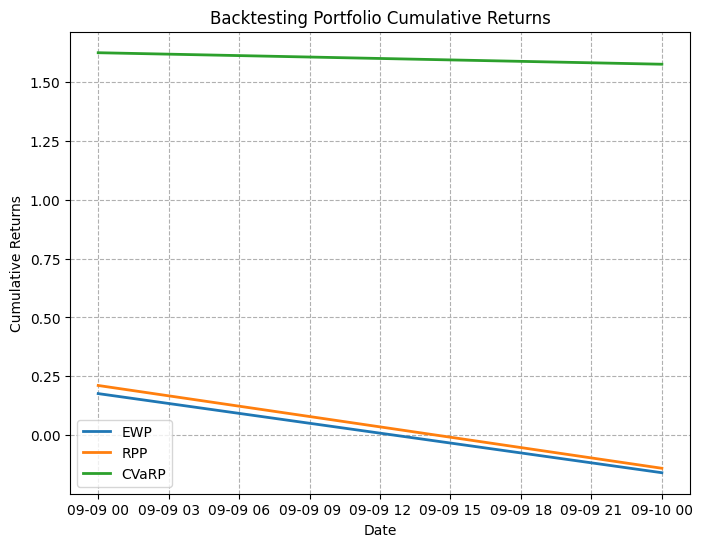

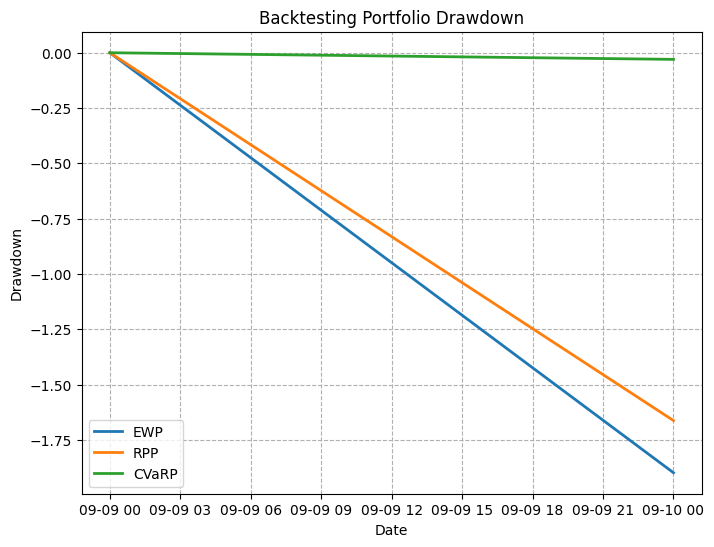

In [6]:
from metrics import backtest, drawdown_time
import matplotlib.pyplot as plt


# Plot backtesting results
def plot_backtesting(test_data, portfolios):
    N = len(portfolios)

    # Calculate and store performance metrics
    for _, w in portfolios:
        cumulative_returns = backtest(test_data, w)
        drawdown = drawdown_time(cumulative_returns)

    # Plot cumulative returns
    plt.figure(figsize=(8, 6))
    for name, w in portfolios:
        cumulative_returns = backtest(test_data, w)
        plt.plot(cumulative_returns, label=name, linewidth=2, zorder=2)
    plt.xlabel("Date")
    plt.ylabel("Cumulative Returns")
    plt.title("Backtesting Portfolio Cumulative Returns")
    plt.legend()
    plt.grid(linestyle="--", zorder=1)
    plt.show()

    # Plot drawdown
    plt.figure(figsize=(8, 6))
    for name, w in portfolios:
        cumulative_returns = backtest(test_data, w)
        drawdown = drawdown_time(cumulative_returns)
        plt.plot(drawdown, label=name, linewidth=2, zorder=2)
    plt.xlabel("Date")
    plt.ylabel("Drawdown")
    plt.title("Backtesting Portfolio Drawdown")
    plt.legend()
    plt.grid(linestyle="--", zorder=1)
    plt.show()


for i in range(len(portfolio_data)):
    start_date = portfolio_data[i]["date"]
    end_date = start_date + timedelta(days=ADJUST_PERIOD)
    test_data = returns.loc[start_date:end_date]
    portfolios = [(name, portfolio) for name, portfolio in portfolio_data[i]["portfolios"].items()]
    plot_backtesting(test_data, portfolios)